In [1]:
# Name : Dhihan Ahmed, Luke Bianchi, Jacob Gurevich
# Assignment Number & Name : EDA - NHL Win Classification (With Event-Level Features)
# I pledge my honor that I have abided by the Stevens Honor System.

In [2]:
%pip install seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [4]:
# Load the dataset
df = pd.read_csv('merged_with_event_features.csv')

df['is_home'] = df['HoA'].map({'home': 1, 'away': 0})

# Define feature list
features = ['shots', 'hits', 'pim', 'powerPlayGoals', 'faceOffWinPercentage',
            'giveaways', 'takeaways', 'blocked', 'avg_shot_x', 'avg_shot_y',
            'close_range', 'num_slap_shot', 'num_wrist_shot', 'won', 'num_backhand','num_slap_shot','num_tip-in', 'is_home']
df = df[features].dropna()

In [5]:
# Normalize the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [6]:
# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_data)

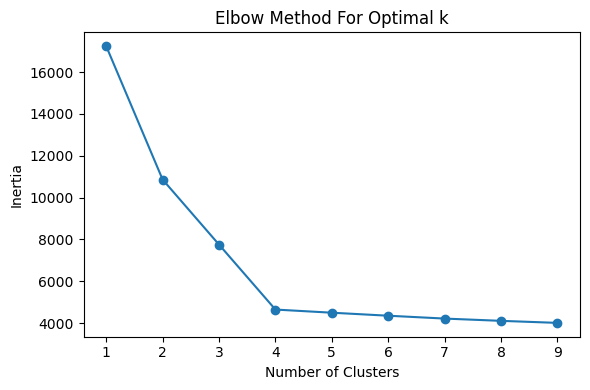

In [7]:
# Elbow Method to determine the optimal number of clusters
inertia = []
K_range = range(1, 10)
for k in K_range:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(scaled_data)
    inertia.append(model.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.tight_layout()
plt.show()

In [8]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

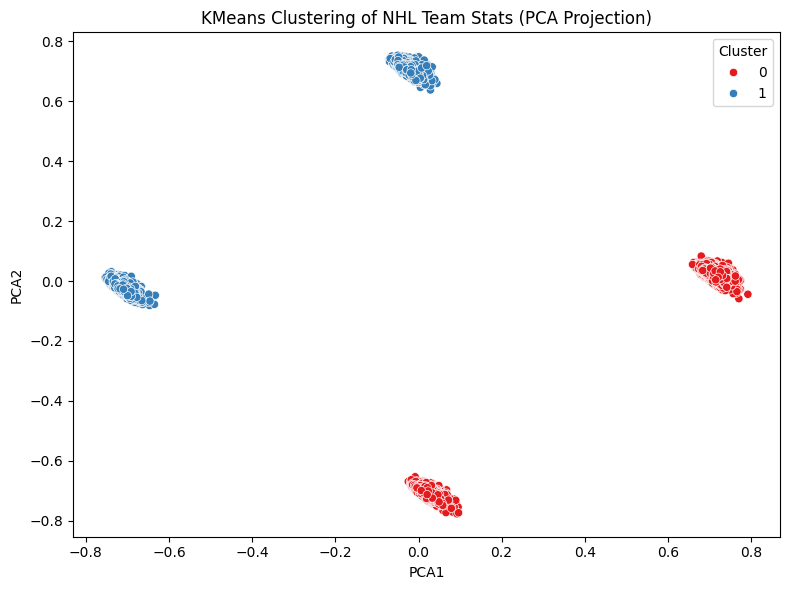

In [9]:
# Visualize clusters with PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1')
plt.title("KMeans Clustering of NHL Team Stats (PCA Projection)")
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

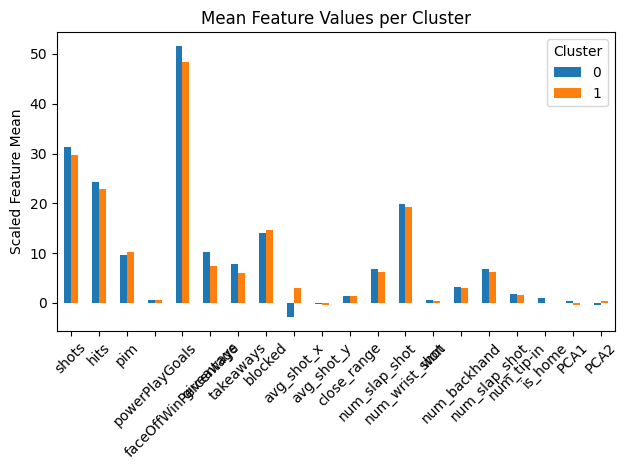

In [10]:
# Cluster means by feature
cluster_means = df.groupby('Cluster').mean()

plt.figure(figsize=(12, 6))
cluster_means.T.plot(kind='bar')
plt.title("Mean Feature Values per Cluster")
plt.ylabel("Scaled Feature Mean")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()